### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Ajuste Polinomal OLS - Dados Aerogerador </b>

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def AIC(y_true, y_pred, n, p):
    
    AIC = n*np.log(np.power(y_true-y_pred,2).sum()) + 2*p

    return (AIC)

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

R2_k, R2aj_k, AIC_k, M_k, y_pred_k = [], [], [], [], []

for k in range(1, 10+1):

    X = input_matrix(x, order = k)

    M = np.linalg.lstsq(X,y, rcond = -1)[0]

    y_pred = np.dot(X, M)
    R2_k.append(R2(y, y_pred, X.shape[0], k)[0])
    R2aj_k.append(R2(y, y_pred, X.shape[0], k)[1])
    AIC_k.append(AIC(y, y_pred, X.shape[0], k))
    M_k.append(M)
    y_pred_k.append(y_pred)
print("R2 máximo = {:.5f} para polinomio de ordem {}".format(np.max(R2_k), np.argmax(R2_k)+1))
print("R2aj máximo = {:.5f} para polinomio de ordem {}".format(np.max(R2aj_k), np.argmax(R2aj_k)+1))
print("AIC Mínimo = {:.5f} para polinomio de ordem {}".format(np.min(AIC_k), np.argmin(AIC_k)+1))

R2 máximo = 0.97394 para polinomio de ordem 10
R2aj máximo = 0.97384 para polinomio de ordem 8
AIC Mínimo = 30140.61234 para polinomio de ordem 8


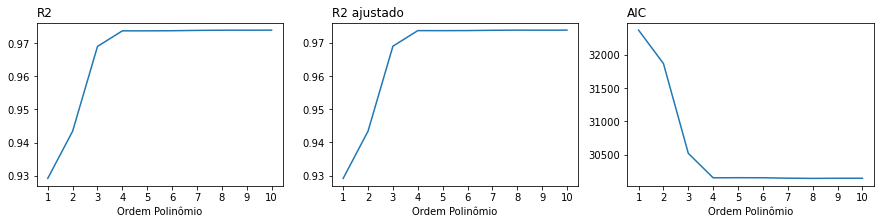

In [9]:
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].plot(range(1, 11,1),R2_k)
axs[1].plot(range(1, 11,1),R2aj_k)
axs[2].plot(range(1, 11,1),AIC_k)

axs[0].set_title("R2", loc = "left")
axs[1].set_title("R2 ajustado", loc = "left")
axs[2].set_title("AIC", loc = "left")

axs[0].set_xlabel("Ordem Polinômio")
axs[1].set_xlabel("Ordem Polinômio")
axs[2].set_xlabel("Ordem Polinômio")

axs[0].set_xticks(range(1, 10+1));
axs[1].set_xticks(range(1, 10+1));
axs[2].set_xticks(range(1, 10+1));
    

Text(0, 0.5, 'Potência Gerada (kW)')

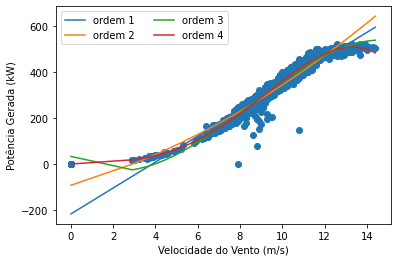

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y);
for k in range(0, 4, 1):
    ax.plot(x, y_pred_k[k], label = "ordem {}".format(k+1))
ax.legend(loc = "upper left", ncol = 2)
ax.set_xlabel("Velocidade do Vento (m/s)")
ax.set_ylabel("Potência Gerada (kW)")

In [48]:
print(M_k[4])

[-1.79826294e-01  8.16387623e+00 -3.93045532e+00  1.24622594e+00
 -5.37024702e-02 -3.75305419e-04]


#### <b>Questão 02 - Ajuste Polinomal - *Local Random Search (LRS)* - Dados Aerogerador </b>

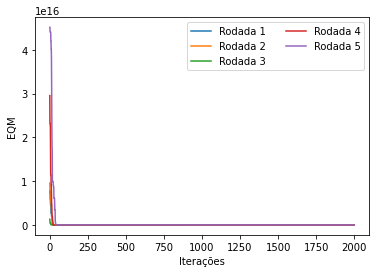

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X
    
data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]
k = 4
X = input_matrix(x, order = k)

Nr = 5
Ns = 2000
M_best_r = []
FO_best_r = []

fig, ax = plt.subplots()
for r in range(Nr):

    M_best = np.random.uniform(-1, 10, size = (k+1,1))
    FO_best = np.power(y - np.dot(X, M_best), 2).sum()
    FO_s = []
    for s in range(Ns):

        M_cand = M_best + np.random.normal(loc = 0, scale = 0.5, size = (k+1,1))
        M_cand[M_cand < -1], M_cand[M_cand > 10]  == -1, 10
        y_pred = np.dot(X, M_cand)
        
        FO = np.power(y - y_pred, 2).sum()

        if FO < FO_best:
            FO_best = FO
            M_best = M_cand
        
        FO_s.append(FO_best)
    ax.plot(FO_s, label = "Rodada {}".format(r+1))
    np.savetxt("M_best_{}.csv".format(r+1), M_best, delimiter = ",")
    M_best_r.append(M_best)
    FO_best_r.append(FO_best)

ax.set_ylabel("EQM")
ax.set_xlabel("Iterações")
ax.legend(loc = "upper right", ncol = 2)

EQM = 66614750075.865, Rodada = 1
EQM = 72371240587.511, Rodada = 2
EQM = 67009432275.443, Rodada = 3
EQM = 80236267475.022, Rodada = 4
EQM = 65020703457.488, Rodada = 5


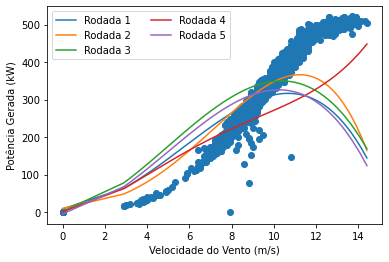

In [30]:

fig, ax = plt.subplots()
ax.scatter(x,y)
for i in range(Nr):
    ax.plot(x, np.dot(X, M_best_r[i]), label = "Rodada {}".format(i+1))
    print("EQM = {:.3f}, Rodada = {}".format(FO_best_r[i], i+1))
ax.legend(loc = "upper left", ncol = 2)
ax.set_xlabel("Velocidade do Vento (m/s)")
ax.set_ylabel("Potência Gerada (kW)");
